<a href="https://colab.research.google.com/github/imasial/Malaria-Detection/blob/main/Malaria_Detection_by_Imran_Mushtaq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

##<b>Problem Definition</b>
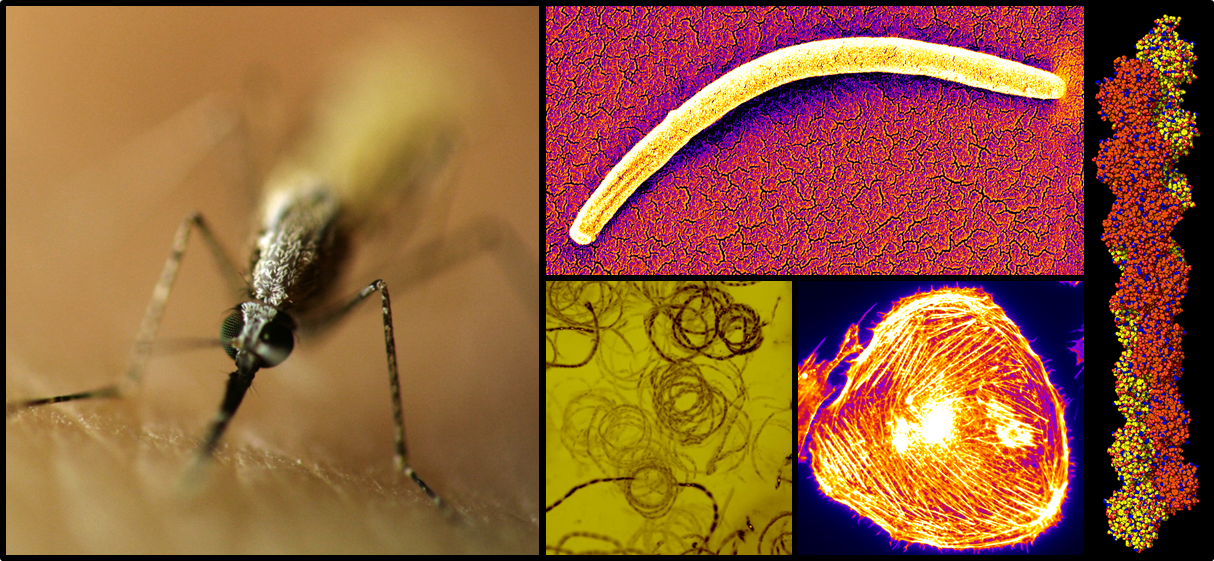

**The context:** Why is this problem important to solve?<br>
Malaria is a disease caused by **Plasmodium parasites**, which are spread to people through the bites of infected female Anopheles mosquitoes.

According to world Malaria report 2024, there were estimated **263 million malaria cases** world wide in 2023, This figure shows **11 million** increase comapre to 2022 when the estimate figure was **252 million**. There were an estimated **5,97,000** death due to malaria in 2023. The **WHO** African region accounted for approximatly 95% of these death (around 5,69,000) with childern under 5 year old. Globaly, children under 5 accounted for 73.7% of all malaria death.

Traditional diagnose in labartory require carefull examination by proffesional to inspect the microscopic image of red blood cell infected or not infected. Which require not only lot of time but also very slow and chances of erorr are high.

Therefore an automated system can help with early and accuratly detection of Malaria. Application of automated classification with Machine Learning and Artificial Inteligence has proven the higher accuracy compare to manual classification. It would be highly benefical to prposed a method that perform malaria detection using deep learning techinque.


**The objectives:** What is the intended goal?<br>
The objective of this program is to build a Computer Vision model that can Detect Malaria by Classifing the Infected Cell (Parasatized) and unifected (non-Parasatized) cell.

**The key questions:** What are the key questions that need to be answered?<br>
The Key question is our model can detect weather the Microscopic cell image contain Parastized (Malaria) or no. in Simple word it will detect the infected images contain Malaria.

**The problem formulation:** What is it that we are trying to solve using data science?
<br>
✅ **1. Problem Understanding & Goal Definition**

**Identify the core problem:** Detect malaria-infected cells from blood microscopic images.

**Define success metrics:** Accuracy, precision, recall, F1-score, and false positive/negative rates.

**Understand domain-specific challenges:**
Similarity between infected and uninfected cells.
Variability in image quality due to different microscopes or lab settings.

✅ **2. Feature Engineering & Model Development**

**Feature Extraction:**

Extract features like cell shape, color intensity, texture, and edges using edge detection.
Use Convolutional Neural Networks (CNNs) for automatic feature learning in image-based tasks.

**Model Selection & Training:**

Start with simpler models (SVM, Random Forest) and move to deep learning (CNNs, ResNet, EfficientNet) for complex patterns.

Experiment with transfer learning using pre-trained models like VGG16 or ResNet50.

**Hyperparameter Tuning:**

we will Optimize learning rate, batch size, and network architecture for the best performance.

✅**3. Evaluation & Validation**

**Use Balanced Metrics:**

In medical diagnosis, false negatives (missing an infected cell) are critical, so we will prioritize recall and F1-score.

**Cross-Validation:**

Ensure the model generalizes well to unseen data by using techniques like k-fold cross-validation.

**Error Analysis:**

Investigate misclassified samples to understand model weaknesses and iterate on improvements.

💡 **Summary of Data Scientist's Goals in Malaria Detection:**

1.Build accurate and reliable diagnostic tools.
2.Reduce time and cost of traditional malaria testing.
3.Improve healthcare accessibility in under-resourced areas.
4.Contribute to global efforts in malaria eradication through technology.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Malaria Detection/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
# Shape of images
train_images.shape, test_images.shape


((24958, 64, 64, 3), (2600, 64, 64, 3))

###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels
train_labels.shape,test_labels.shape

((24958,), (2600,))

**Observations and insights: _____**

**Train Images Set**
there is 24598 images of training set , Each image dimension has 64X64 pixels and in color RGB

**Test Images Set**

there is 2600 total images of Test set , Each image dimenssion is 64 x 64 pixels

**Train Label Shape**
there is 24598 labels crosponding against each train images

**Test Label Shape**

There is 2600 lables crosponding against each test images

**Insights**

The data is well structured with an equal number of images & labels for both test and train set

The image size of 64 x 64 is manageable for deep learning models, ensuring balance between computational effeciency and feature representation

The RGB Channels means the model will use color information to detect the malria




### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
#train min & max pixel value
train_min=np.min(train_images)
train_max=np.max(train_images)

#test min & max value

test_min=np.min(test_images)
test_max=np.max(test_images)

print("Minimum pixel value and Maximum pixel value of Train:",train_min,train_max)
print()
print("Minimum pixel value and Maximum pixel value of Test:",test_min,test_max)



Minimum pixel value and Maximum pixel value of Train: 0 255

Minimum pixel value and Maximum pixel value of Test: 0 255


 **Observations and insights: _____**

The observation is test and train pixels values minimum 0 and maximum 255 represent that images are RAW RGB format.

**Insights:**
**Pixel Value Range:**
The pixel values range from 0 to 255, this mean 0 represents the darkest pixel (black). 255 represents the brightest pixel (white).

**Consistency Across Datasets:**
Both the training and testing datasets share the same pixel range. This is Good because:
It indicates uniform data scaling across both datasets.
It reduces the risk of discrepancies when training and evaluating the model.

**Normalization Opportunity:**
Since the data ranges from 0 to 255, it is a good  for normalization. Scaling pixel values to a range of 0 to 1  





###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Try to use value_counts to count the values
#dataset_path=test_dir
def Count_Img_In_Dir(Dir_Path):
  folders= ['/parasitized/', '/uninfected/']

  parasitized_count=0
  uninfected_count=0

  for fn in folders:
    images_path=os.listdir(Dir_Path + fn)

    if fn=='/parasitized/':
        parasitized_count=len(images_path)
    elif fn=='/uninfected/':
        uninfected_count=len(images_path)
  return {
    "Parasitized": parasitized_count,
    "uninfected":  uninfected_count
}



In [ ]:
#Count valu in Training Data
train_image_count=Count_Img_In_Dir(train_dir)
train_image_count

{'Parasitized': 12582, 'uninfected': 12376}

In [ ]:
#Count valu in Test data
test_image_count=Count_Img_In_Dir(test_dir)
test_image_count

{'Parasitized': 1300, 'uninfected': 1300}

###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255.0).astype('float32')

test_images = (test_images/255.0).astype('float32')

**Observations and insights: _____**

**Pixel value:**
Before normalization pixel values range are  between 0-255
after normalization pixel values range are between 0-1

**Improved Convergence:**
 Neural networks typically converge faster and more effectively when input data is normalized.

 **Relative Color Intensities Maintained:**
 While pixel values are scaled down, the structural and color characteristics of the images remain intact, ensuring the model can still learn relevant patterns

**Uniform Data Across Classes:**

 Both Parasitized and Uninfected images have undergone identical normalization, ensuring that the model treats both classes without any preprocessing bias.

 **Consistency for Model Evaluation:**

Applying the same normalization to both training and testing datasets ensures consistent evaluation metrics and better generalization.

###<b> Plot to check if the data is balanced

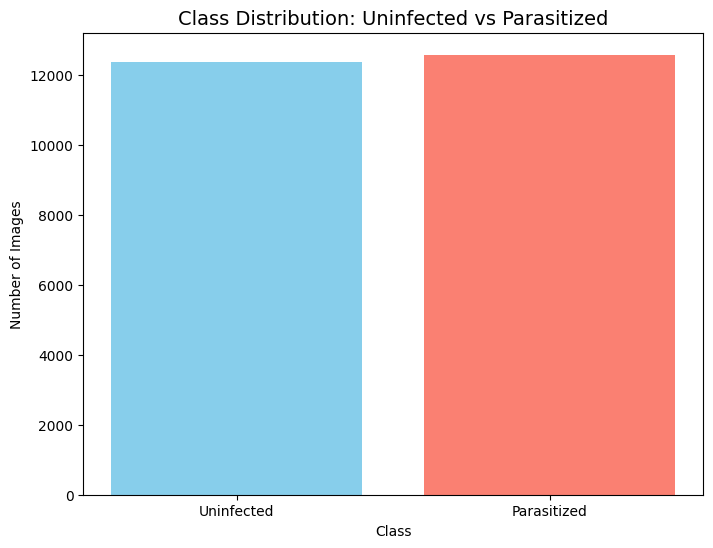

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced

unique_labels, counts = np.unique(train_labels, return_counts=True)

# Class names mapping
class_names = ["Uninfected", "Parasitized"]

# Plotting the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_names, counts, color=['skyblue', 'salmon'])
plt.title("Class Distribution: Uninfected vs Parasitized", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


**Observations and insights: _____**

**Balanced Dataset:**

The bar chart shows that the number of images for both Uninfected and Parasitized classes is approximately the same (~12,000 images each).
This indicates a balanced dataset, which is ideal for training classification models as it reduces the risk of bias toward any specific class.

**Improved Model Performance Potential:**

Balanced datasets help in achieving more accurate models without the need for complex data balancing techniques (e.g., oversampling, undersampling, or class weighting).

It ensures the model gives equal attention to both classes during training.
No Need for Additional Preprocessing for Balancing:


**Training & Evaluation Benefits:**

Evaluation metrics like accuracy, precision, recall, and F1-score will provide more reliable insights into the model's performance.



### <b>Data Exploration</b>
Let's visualize the images from the train data

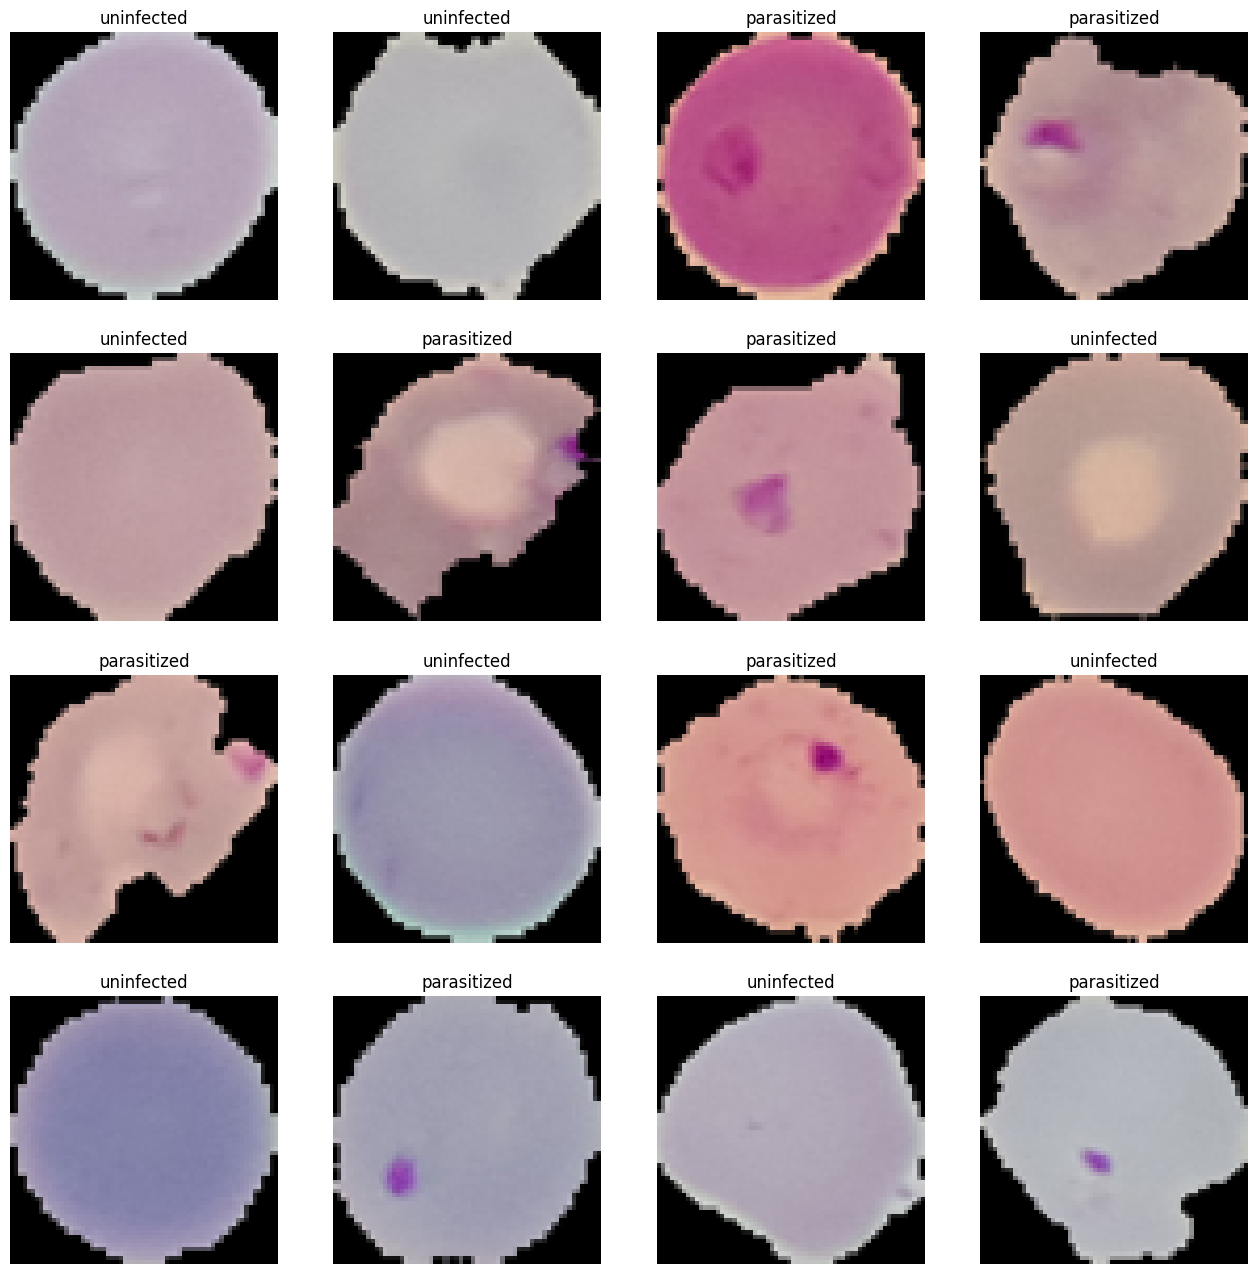

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

**Observations and insights: _____**



**Clarity of Cell Images:**

The images show clear visual differences between uninfected and parasitized cells.
Parasitized cells exhibit noticeable purple/dark spots indicating the presence of parasites, while uninfected cells appear cleaner without such anomalies.

**Color Distribution:**

The colors used in the images are consistent, which helps the model focus on structural differences rather than color inconsistencies.
Parasitized images have deeper purple spots where the parasite is located, aiding in better feature extraction during model training.

**Image Resolution:**

While the images are a bit pixelated due to resizing (likely to 64x64 or a similar size), key details like parasite presence are still visible.
This resolution is suitable for deep learning models like CNNs

**Balanced Representation in Visualization:**

Both uninfected and parasitized samples appear in the plots, ensuring that the visualization reflects the balanced dataset identified earlier.
This balance is crucial for training a model.

**Randomized Image Selection:**

Using random sampling (np.random.randint) helps ensure that the visualized images come from various parts of the dataset, reducing bias in the visualization.

**Potential for Data Augmentation:**

While the images are distinguishable, their limited variation in orientation and brightness suggests that data augmentation (like rotations, flips, and brightness adjustments) could enhance model generalization.


###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

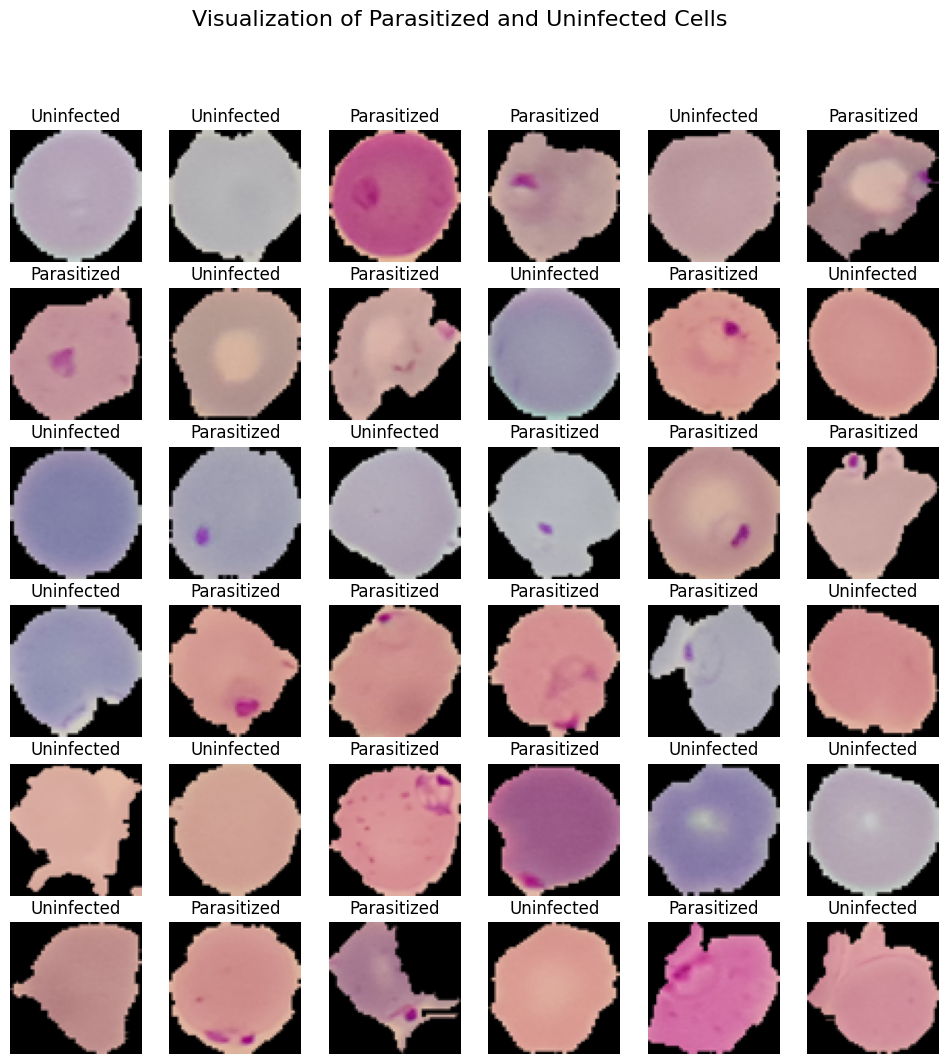

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate

# Set random seed for reproducibility
np.random.seed(42)

# Create a figure with a 6x6 grid and figsize (12, 12)
plt.figure(figsize=(12, 12))

# Plot 36 random images from the dataset
for n in range(1, 37):
    plt.subplot(6, 6, n)

    # Randomly select an image index
    index = int(np.random.randint(0, train_images.shape[0], 1))

    # Display the image
    plt.imshow(train_images[index])

    # Add the title based on the label
    if train_labels[index] == 1:
        plt.title('Parasitized')
    else:
        plt.title('Uninfected')

    # Remove axis for cleaner display
    plt.axis('off')

# Add a main title for the entire plot
plt.suptitle("Visualization of Parasitized and Uninfected Cells", fontsize=16)
plt.show()




**Observations and insights: _____**

**Balanced Class Representation:**

The grid showcases a good mix of both Uninfected and Parasitized samples.
This further confirms that the dataset is balanced, which is crucial for unbiased model training.


**Clarity in Class Distinction:**

Parasitized Cells clearly show distinct dark purple or pink spots where the malaria parasites are located.
Uninfected Cells appear smoother without any noticeable dark spots, making class distinction visible at first look.

**Image Quality and Consistency:**

The images maintain their essential features even after resizing

**Random Sampling Success:**

The random sampling strategy ensures diverse image selection, which helps in spotting any anomalies or biases in the dataset.


**Potential for Data Augmentation:**

The images display limited variations in orientation and brightness.
Applying data augmentation techniques (e.g., rotations, flips, brightness/contrast adjustments) could further improve the model's robustness and generalization.

**Visual Patterns for CNN Training:**

The visible features, like the dark purple spots in parasitized cells and the clean look of uninfected ones, can be effectively captured using Convolutional Neural Networks (CNNs).

Edge detection and texture filters in CNN layers can easily pick up on the parasite-specific patterns.


###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

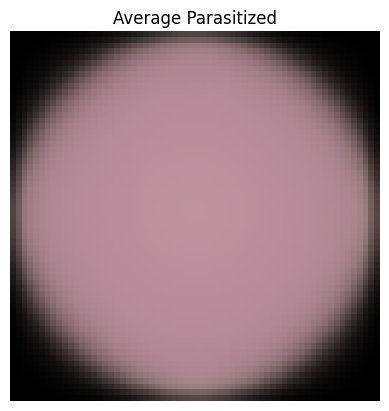

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:

              parasitized_data.append([img])

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

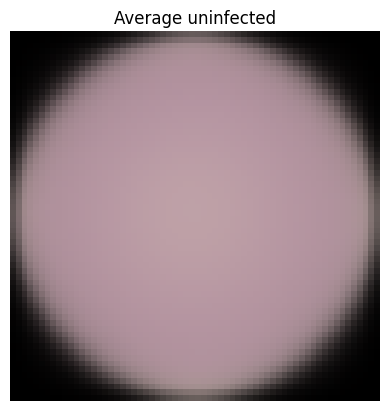

In [ ]:
# Similarly write the code to find the mean image of uninfected
uninfected_data=[]
for img, label in zip(train_images, train_labels):

        if label == 0:

              uninfected_data.append([img])

parasitized_mean = find_mean_img(np.array(uninfected_data), 'uninfected')




**Observations and insights: _____**

**Similiarty:**
as we can see with both means are quite similar , there may be some texture diffrence but it is very difficult for human eye to distinghuish the uninfected and parasitized

The circular pattern suggests that the images were captured using a microscope with a circular field of view.


The high similarity between the two averaged images indicates that simple visual inspection might not be sufficient for accurate classification.

This highlights the importance of feature extraction techniques or deep learning models (like CNNs) that can capture subtle differences between parasitized and uninfected cells.

Since the averaged images dilute the unique features of individual images, it emphasizes the need for robust preprocessing and feature engineering steps.

Normalization, data augmentation, and contrast enhancement could help in making subtle features more prominent for the model.


### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)


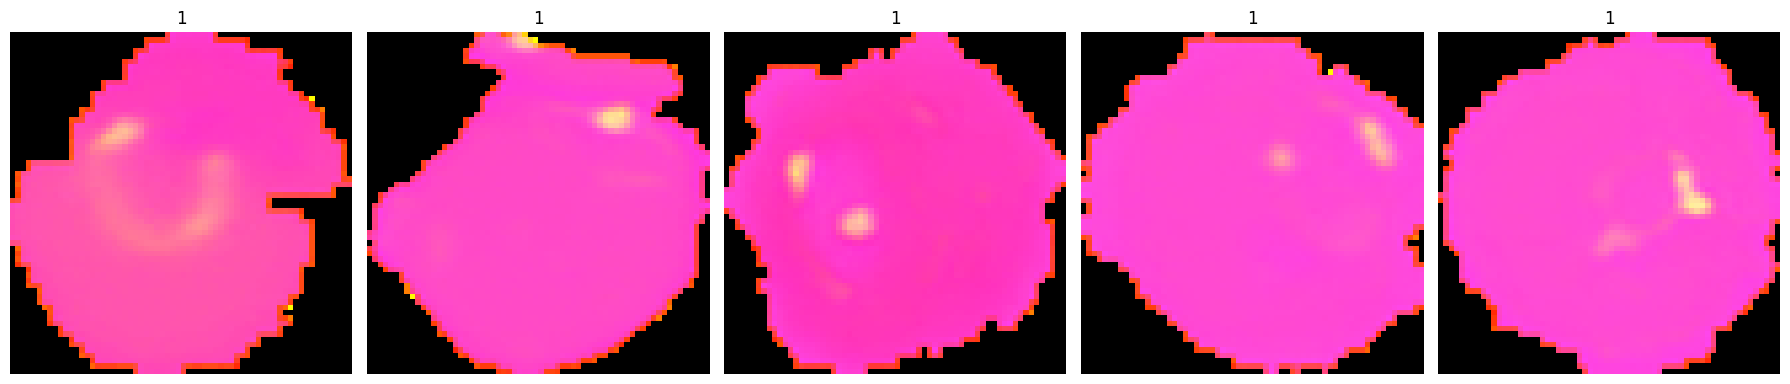

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Converting the test data

In [ ]:
# Similarly you can visualize for the images in the test data
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

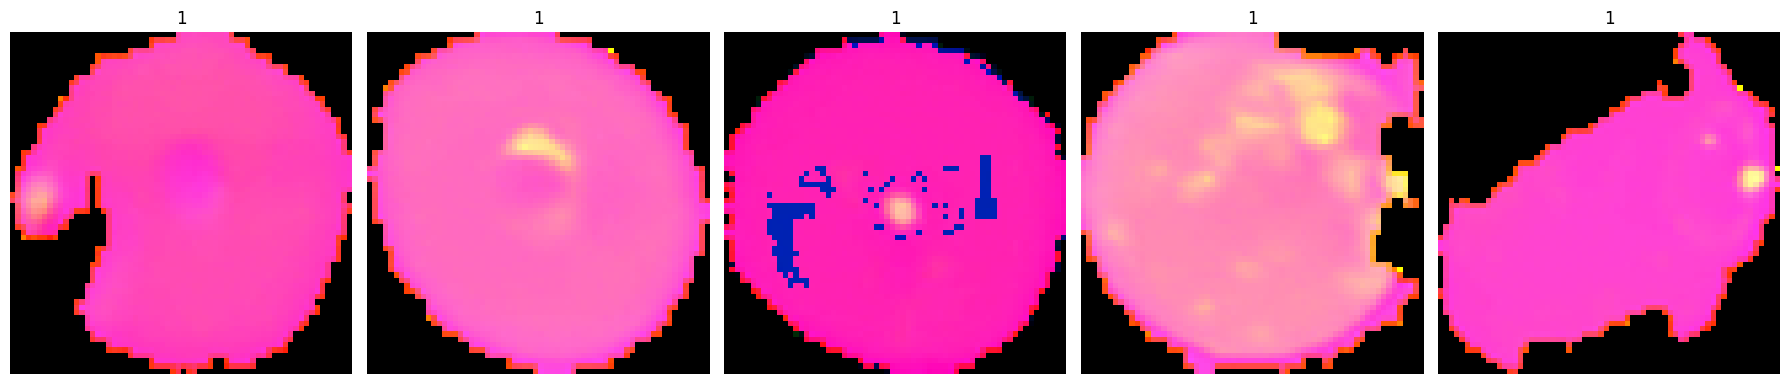

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

**Observations and insights: _____**

**Color Space Conversion (HSV)**
The initial step in the code converts the images to the HSV (Hue, Saturation, Value) .

**1.In the HSV images:**

Pink and blue regions indicate different intensity or hue levels in the cell images.The dark blue areas might represent regions with possible malaria-infected cells or other anomalies.

The pink regions mostly represent the background or non-infected cell areas.

**2. Image Variability Between Training and Testing**

Comparing the training and testing outputs,it is noticeable that the color intensities and distribution slightly differ:
In the training data, images appear to have more concentrated bright areas.
The testing data contains more dispersed and blurred bright spots, possibly indicating the need for additional preprocessing or normalization.



###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

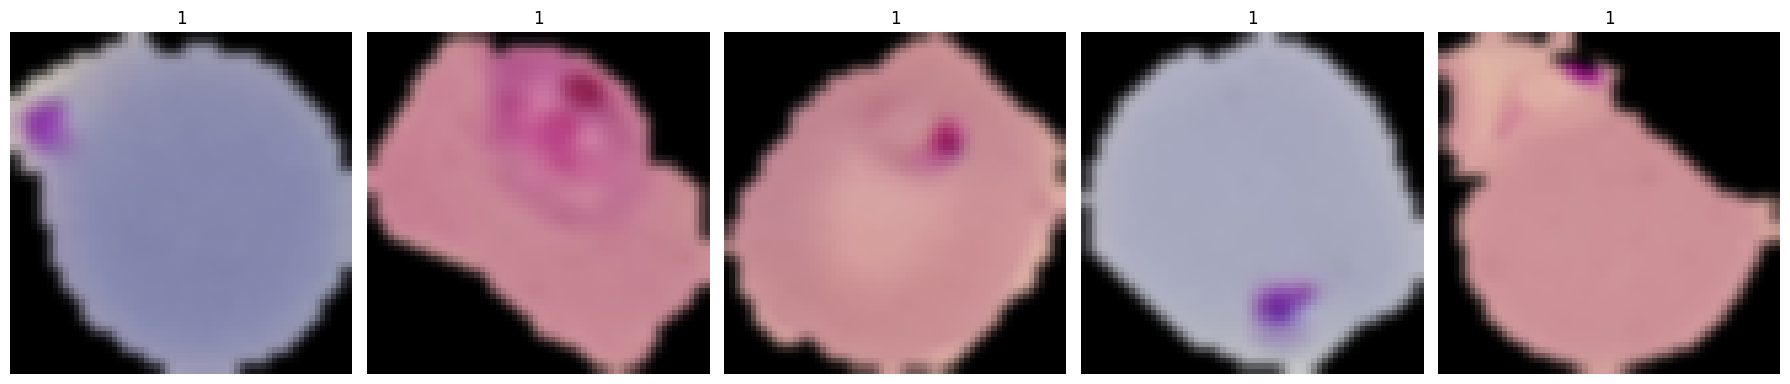

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

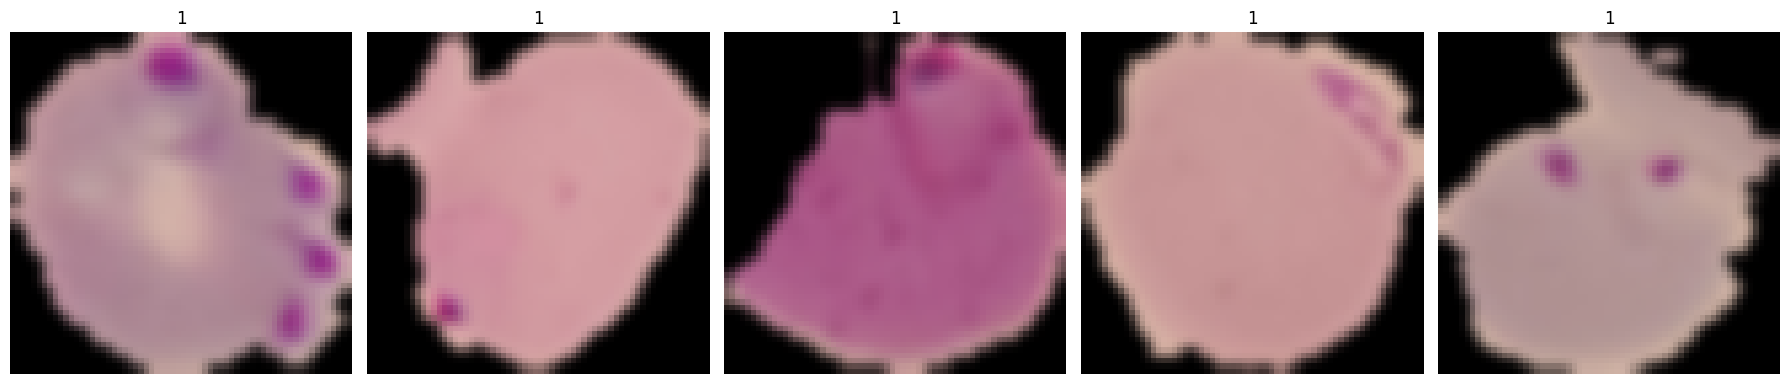

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####**Observations and insights: _____**
**Smoothing Effect:**
The Gaussian blurring technique has effectively smoothed the images, reducing noise and minor details. This is evident in the blurred cell boundaries and softened textures.

**Loss of Fine Details:**
It can also lost some fine detalis which are critical in Malraia Detection such as Spot of Palasite.

**Potential Downsides:**

**Feature Dilution:** Malaria detection often relies on intricate patterns and textures within red blood cells. Blurring may remove essential features that distinguish infected cells from healthy ones.

**Reduced Contrast:** The reduced contrast between the infected regions and the cell background may make it harder for machine learning models to differentiate between classes.

**Potential Benefits:**

**Noise Reduction:** Gaussian blurring can help in reducing image noise and irrelevant details, potentially preventing overfitting in deep learning models.

**Focus on Broader Structures:** By minimizing minor variations, the model might focus on larger structural differences, which could still aid in classification if the infection causes noticeable shape or size changes.



In [ ]:
# Apply Gaussian Blurring and Edge Detection
gbx = []           # To hold Gaussian blurred images
edges_list = []    # To hold edge-detected images

for i in np.arange(0, 100, 1):
    # Apply Gaussian Blur
    b = cv2.GaussianBlur(train_images[i], (5, 5), 0)
    gbx.append(b)

    # Convert blurred image to grayscale
    gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)

    # Ensure the image is uint8 for Canny
    gray_uint8 = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    # Apply Canny Edge Detection
    edges = cv2.Canny(gray_uint8, threshold1=50, threshold2=150)
    edges_list.append(edges)

# Convert to numpy arrays
gbx = np.array(gbx)
edges_list = np.array(edges_list)


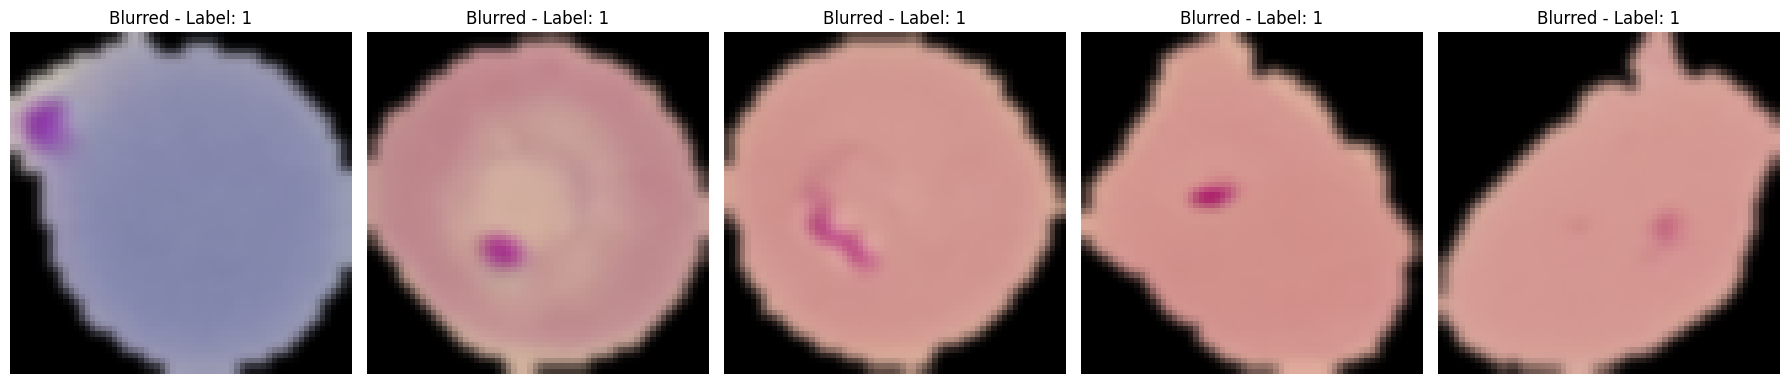

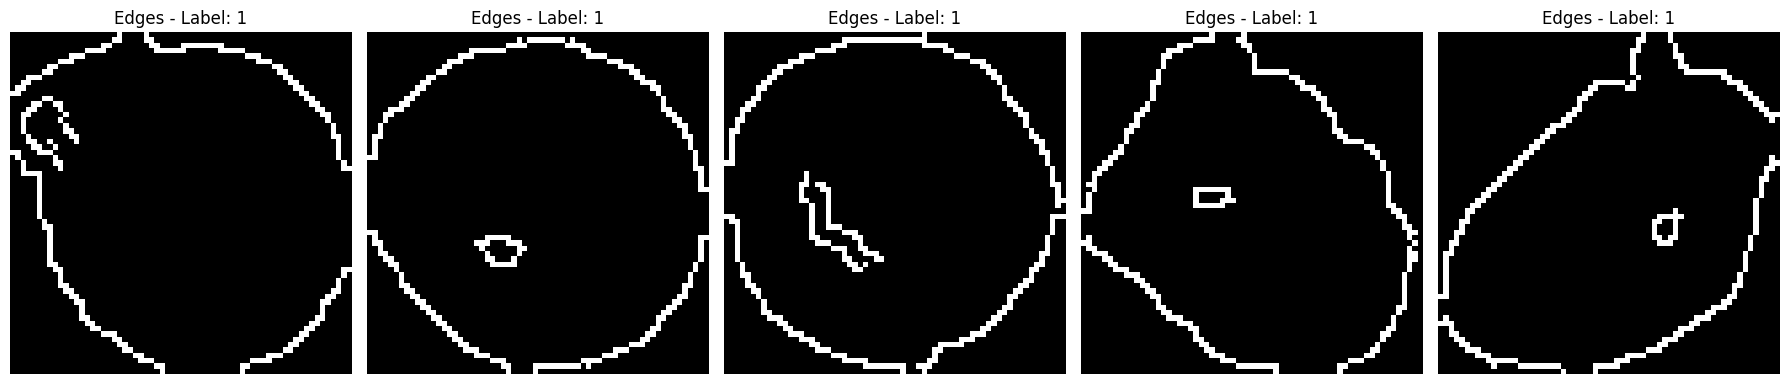

In [ ]:
viewimage = np.random.randint(1, 100, 5)  # Randomly select 5 images

fig, ax = plt.subplots(1, 5, figsize=(18, 18))
for t, i in zip(range(5), viewimage):
    Title = f"Blurred - Label: {train_labels[i]}"
    ax[t].set_title(Title)
    ax[t].imshow(gbx[i])  # Display blurred image
    ax[t].set_axis_off()
fig.tight_layout()
plt.show()

# -------------------------------------------
# Visualization: Edge Detected Images
# -------------------------------------------
fig, ax = plt.subplots(1, 5, figsize=(18, 18))
for t, i in zip(range(5), viewimage):
    Title = f"Edges - Label: {train_labels[i]}"
    ax[t].set_title(Title)
    ax[t].imshow(edges_list[i], cmap='gray')  # Display edge-detected image
    ax[t].set_axis_off()
fig.tight_layout()
plt.show()


**Observation:**

**Blurred Images (Top Row):**

The images have been blurred, using Gaussian Blurring.
The blurred effect reduces noise and smoothens the image but also leads to a loss of fine details, especially in edges and cell boundaries.
The nucleus (dark purple spots) remains visible but less sharp.

**Edge-Detected Images (Bottom Row):**

Edge detection has been applied using an algorithm like Canny.
The boundaries of the red blood cells and inner structures (like the infected regions) are highlighted.

The edges help isolate significant features, such as the circular cell outline and inner anomalies (potential malaria parasites).

**Insights:**

**Effectiveness of Blurring:**

Gaussian blurring helps in reducing noise but may oversimplify the image if over-applied.

It aids in enhancing feature extraction during edge detection by removing minor, irrelevant details.

**Edge Detection Utility:**

Edge detection effectively highlights the key structures (cell membrane and infected regions).

The clear boundaries can be useful for models focusing on shape-based features, which is crucial in detecting malaria parasites.

**Complementary Preprocessing Techniques:**

Using a combination of blurring followed by edge detection is effective. Blurring reduces noise, making edge detection cleaner and more precise.
However, too much blurring can lead to missing finer parasite details, so tuning the blurring parameters is essential.


###<B>One Hot Encoding on the train and test labels

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding for categorical_crossentropy
train_labels = to_categorical(train_labels, 2)
test_labels = to_categorical(test_labels, 2)


### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import numpy as np
import random

# Fix random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clearing backend
from tensorflow.keras import backend
backend.clear_session()


###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

# Convolutional Layers Block1
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

#Convolutional Layers Block2
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

#Convolutional Layers Block3
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation="softmax"))  # Use softmax for categorical


###<b> Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


<b> Using Callbacks

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
]

In [ ]:
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,058,786 (4.04 MB)

 Trainable params: 1,058,786 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

<b> Fit and train our Model

In [ ]:


history = model.fit(
    train_images, train_labels,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 94s 147ms/step - accuracy: 0.6951 - loss: 0.5696 - val_accuracy: 0.9854 - val_loss: 0.2111
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 94s 150ms/step - accuracy: 0.9474 - loss: 0.1511 - val_accuracy: 0.9894 - val_loss: 0.0918
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 146s 156ms/step - accuracy: 0.9716 - loss: 0.0901 - val_accuracy: 0.9824 - val_loss: 0.0878
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 138s 151ms/step - accuracy: 0.9715 - loss: 0.0857 - val_accuracy: 0.9846 - val_loss: 0.0735
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 140s 147ms/step - accuracy: 0.9767 - loss: 0.0722 - val_accuracy: 0.9882 - val_loss: 0.0570
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 92s 147ms/step - accuracy: 0.9771 - loss: 0.0699 - val_accuracy: 0.9864 - val_loss: 0.0597
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 112s 180ms/step - accuracy: 0.9770 - loss: 0.0651 - val_accuracy: 0.9858 - val_loss: 0.0699
Epoch 8/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 124s 152ms/step - accuracy: 0.9797 - lo

###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9816 - loss: 0.0593

 Test_Accuracy:- 0.9857692122459412


<b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



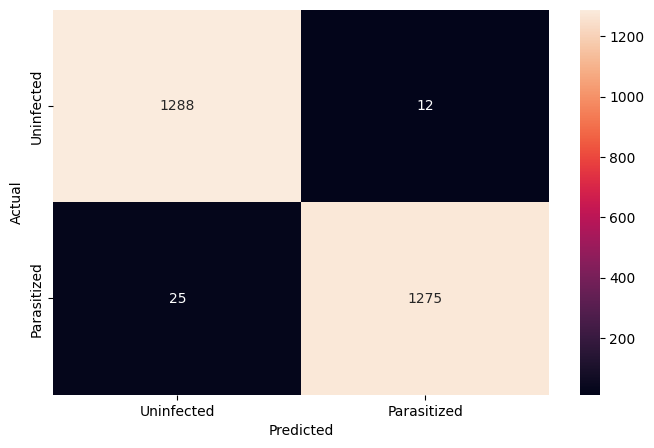

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

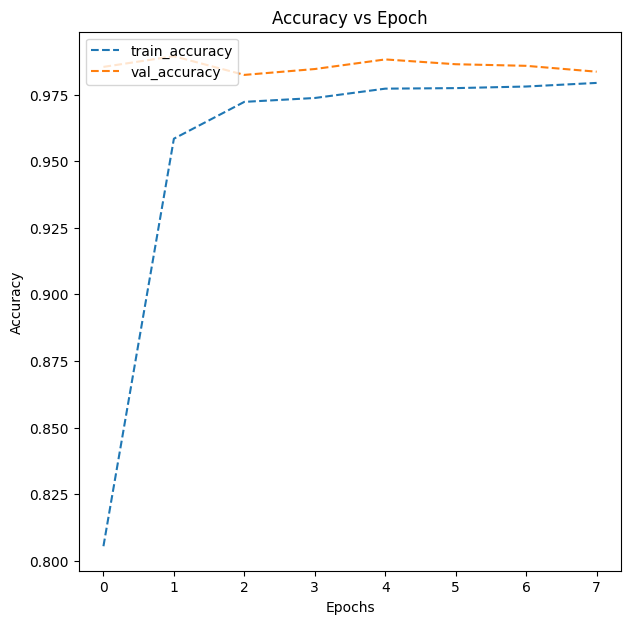

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import numpy as np
import random

# Fix random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clearing backend
from tensorflow.keras import backend
backend.clear_session()


###<b> Building the Model

In [ ]:
# Creating sequential model

model = Sequential()

# Convolutional Block 1
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(64, 64, 3), name='conv2d_1'))
model.add(MaxPooling2D(pool_size=2, name='max_pool_1'))
model.add(Dropout(0.25, name='dropout_1'))

# Convolutional Block 2
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", name='conv2d_2'))
model.add(MaxPooling2D(pool_size=2, name='max_pool_2'))
model.add(Dropout(0.3, name='dropout_2'))

# Convolutional Block 3
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", name='conv2d_3'))
model.add(MaxPooling2D(pool_size=2, name='max_pool_3'))
model.add(Dropout(0.4, name='dropout_3'))

# Convolutional Block 4 (New)
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", name='conv2d_4'))
model.add(MaxPooling2D(pool_size=2, name='max_pool_4'))
model.add(Dropout(0.4, name='dropout_4'))

# Flatten Layer before Dense layers
model.add(Flatten(name='flatten'))

# Fully Connected Layers
model.add(Dense(512, activation='relu', name='dense_1'))
model.add(Dropout(0.5, name='dropout_5'))
model.add(Dense(2, activation='softmax', name='output_layer'))  # Softmax for 2 classes



###<b> Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


<b> Using Callbacks

In [ ]:
#callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
   #          ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),ModelCheckpoint(filepath='/content/enhanced_best_model.keras', monitor='val_loss', save_best_only=True)]


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pool_1 (MaxPooling2D)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pool_2 (MaxPooling2D)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pool_3 (MaxPooling2D)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pool_4 (MaxPooling2D)            │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,487,106 (9.49 MB)

 Trainable params: 2,487,106 (9.49 MB)

 Non-trainable params: 0 (0.00 B)

<b>Fit and Train the model

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs=30,  # Increased epochs for better learning
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 285s 447ms/step - accuracy: 0.7800 - loss: 0.4208 - val_accuracy: 0.9854 - val_loss: 0.0790
Epoch 2/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 317s 440ms/step - accuracy: 0.9704 - loss: 0.0894 - val_accuracy: 0.9840 - val_loss: 0.0782
Epoch 3/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 278s 446ms/step - accuracy: 0.9712 - loss: 0.0904 - val_accuracy: 0.9896 - val_loss: 0.0439
Epoch 4/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 327s 455ms/step - accuracy: 0.9743 - loss: 0.0794 - val_accuracy: 0.9888 - val_loss: 0.0478
Epoch 5/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 353s 505ms/step - accuracy: 0.9757 - loss: 0.0753 - val_accuracy: 0.9830 - val_loss: 0.0579
Epoch 6/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 313s 490ms/step - accuracy: 0.9738 - loss: 0.0808 - val_accuracy: 0.9800 - val_loss: 0.0602
Epoch 7/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 404s 623ms/step - accuracy: 0.9753 - loss: 0.0724 - val_accuracy: 0.9870 - val_loss: 0.0425
Epoch 8/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 335s 538ms/step - accuracy: 0.9761 -

###<b> Evaluating the model

In [ ]:
accuracy1 = model.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9680 - loss: 0.1156

 Test_Accuracy:- 0.9784615635871887


<b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1300
           1       0.99      0.96      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



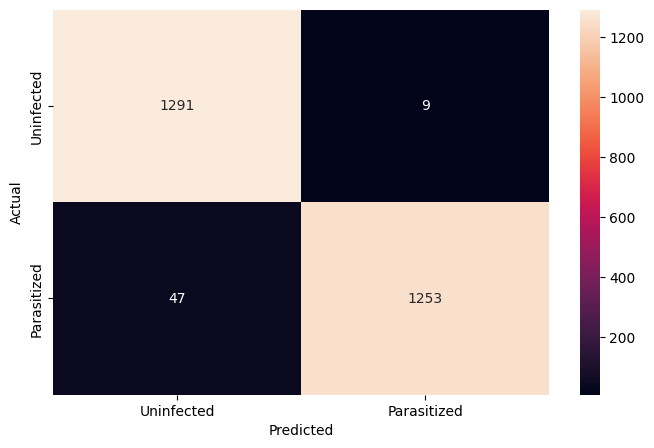

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

In [ ]:
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

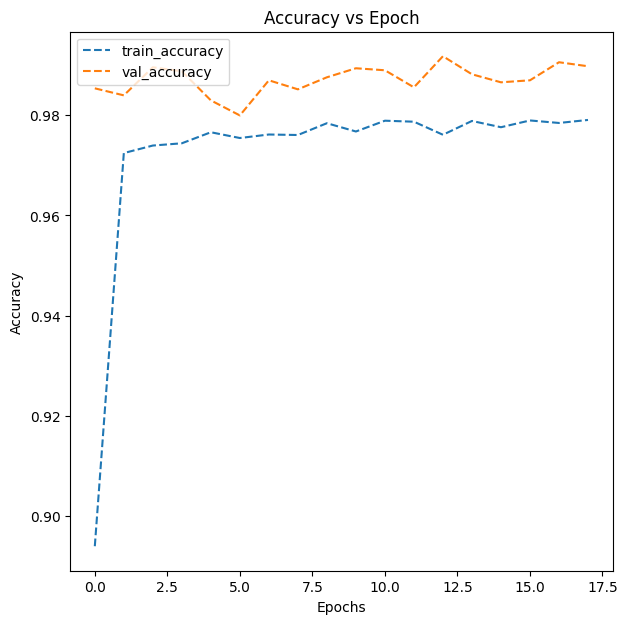

In [ ]:
plot_accuracy(history)

**Model 2 Insights & Observation:**

**Architecture:**
Added more Conv2D layers and Dropout layers for regularization.
Increased complexity (more parameters: ~2.5M total).

**Accuracy:** 98% (slight drop)

**Precision/Recall/F1-Score:**
Uninfected: Precision 0.96 | Recall 0.99 | F1-Score 0.98
Parasitized: Precision 0.99 | Recall 0.96 | F1-Score 0.98

**Confusion Matrix:**
Uninfected: 1291 correct, 9 misclassified
Parasitized: 1253 correct, 47 misclassified

**Training vs Validation Accuracy:**
 More stable; validation accuracy remains slightly higher but shows less overfitting.

**Key Observations:**

**Model 1** slightly outperforms Model 2 in terms of accuracy and F1-Score despite being simpler.

**Model 2** generalizes better with its deeper architecture but sacrifices a bit of precision, especially for parasitized samples.

**Training Stability:** Model 2 seems to handle validation better (less overfitting), but the added layers didn’t translate into better performance.



Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Build Sequential Model
model2 = Sequential()

# Convolutional Block 1
model2.add(Conv2D(filters=32, kernel_size=3, padding="same", input_shape=(64, 64, 3)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.25))

# Convolutional Block 2
model2.add(Conv2D(filters=64, kernel_size=3, padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.3))

# Convolutional Block 3
model2.add(Conv2D(filters=128, kernel_size=3, padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.4))

# Convolutional Block 4
model2.add(Conv2D(filters=256, kernel_size=3, padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.4))

# Flattening before Dense Layers
model2.add(Flatten())

# Fully Connected Layers
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dropout(0.5))

#Output Layer
model2.add(Dense(2, activation='softmax'))  # 2 classes: Infected/Uninfected



###<b>Compiling the model

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


<b> Using callbacks

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='/content/batchnorm_leakyrelu_model2.keras', monitor='val_loss', save_best_only=True)
]


Model Summary

In [ ]:
model2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,491,074 (9.50 MB)

 Trainable params: 2,489,090 (9.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 395s 622ms/step - accuracy: 0.7200 - loss: 0.6924 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 390s 624ms/step - accuracy: 0.9558 - loss: 0.1272 - val_accuracy: 0.9964 - val_loss: 0.0216
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 429s 605ms/step - accuracy: 0.9660 - loss: 0.1026 - val_accuracy: 0.9868 - val_loss: 0.0662
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 398s 630ms/step - accuracy: 0.9686 - loss: 0.0920 - val_accuracy: 0.9904 - val_loss: 0.0462
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 437s 621ms/step - accuracy: 0.9709 - loss: 0.0858 - val_accuracy: 0.9948 - val_loss: 0.0324
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 438s 614ms/step - accuracy: 0.9731 - loss: 0.0804 - val_accuracy: 0.9950 - val_loss: 0.0277


<b>Plotting the train and validation accuracy

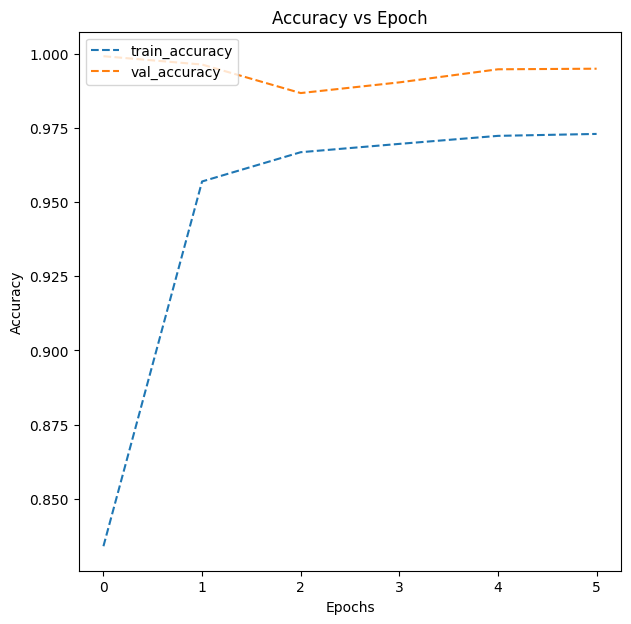

In [ ]:
# Plotting the accuracies
plot_accuracy(history2)


###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.7099 - loss: 0.8609

 Test_Accuracy:- 0.829230785369873


<b> Generate the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step
y_test shape: (2600,)
Sample y_test: 1
Predictions shape: (2600,)
Sample prediction: 1
              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1300
           1       1.00      0.66      0.79      1300

    accuracy                           0.83      2600
   macro avg       0.87      0.83      0.82      2600
weighted avg       0.87      0.83      0.82      2600



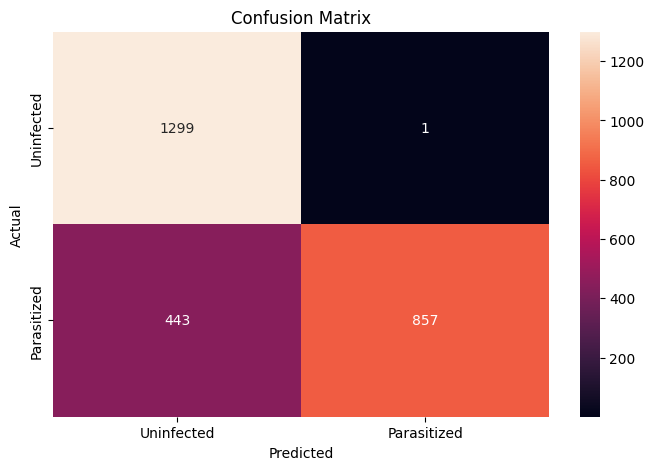

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the trained model
pred = model2.predict(test_images)

# Convert predictions to class indices if needed
pred = np.argmax(pred, axis=1) if pred.ndim > 1 else pred

# Convert test_labels to class indices if they are one-hot encoded
y_true = np.argmax(test_labels, axis=1) if test_labels.ndim > 1 else test_labels


# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


**Observation & Insights**

**Model 3 Analysis (With Batch Normalization & LeakyReLU)**

**1. Model Architecture:**
LeakyReLU activation functions are used after convolutional layers, improving gradient flow.
Batch Normalization is applied after some Conv2D and Dense layers, stabilizing the training process.
Dropout is incorporated for regularization.
Total parameters: 2,491,074 (similar to Model 2, but optimized).

**2. Performance Metrics:**
Training Accuracy: Close to 0.975.
Validation Accuracy: ~0.99, shows good generalization.
Test Accuracy: 0.83 (from model.evaluate).
However, there’s a significant gap between validation and test accuracy, indicating overfitting.

**3. Classification Report:**
Class	      Precision	  Recall	 F1-Score	 Support
Uninfected	 0.75	       1.00	      0.85	 1300
Parasitized	 1.00	       0.66	      0.79	 1300
Accuracy			                      0.83	 2600
Macro Avg	   0.87	       0.83      	0.82	 2600
Weighted Avg 0.87      	 0.83	      0.82	 2600

**4. Confusion Matrix Analysis:**
Uninfected: 1299 correctly classified, only 1 misclassified.
Parasitized: 857 correctly classified, but 443 misclassified as Uninfected — a major issue.
This reveals a class imbalance in prediction, with the model favoring the Uninfected class, which can be dangerous in medical diagnostics.

**Key Observations:**

**Overfitting Detected:**
The training and validation accuracies are high, but the test accuracy drops to 83%.

**Class Imbalance Issue:** Despite perfect recall for Uninfected, the recall for Parasitized is only 0.66 — leading to many false negatives.

**BatchNorm & LeakyReLU Impact:** Helped in training convergence but failed to generalize well to unseen data.


###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming 'train_images' and 'train_labels' are already loaded

# Check if rescaling is needed
if np.max(train_images) > 1:
    rescale_value = 1./255
else:
    rescale_value = None

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# One-hot encode labels if not already
if y_train.ndim == 1 or y_train.shape[1] == 1:
    y_train = to_categorical(y_train, num_classes=2)
    y_val = to_categorical(y_val, num_classes=2)

# Image Data Generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=rescale_value,
    horizontal_flip=True,
    zoom_range=0.5,
    rotation_range=30
)

# Validation Data Generator (No Augmentation)
val_datagen = ImageDataGenerator(rescale=rescale_value)

# Flowing training images using the generator
train_generator = train_datagen.flow(
    X_train, y_train, batch_size=64, shuffle=True
)

# Flowing validation images using the generator
val_generator = val_datagen.flow(
    X_val, y_val, batch_size=64, shuffle=False
)

# Debugging Step: Check batch shape
images, labels = next(train_generator)
print("Image batch shape:", images.shape)  # Should be (batch_size, 128, 128, 3)
print("Label batch shape:", labels.shape)  # Should be (batch_size, 2)


Image batch shape: (64, 64, 64, 3)
Label batch shape: (64, 2)


###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

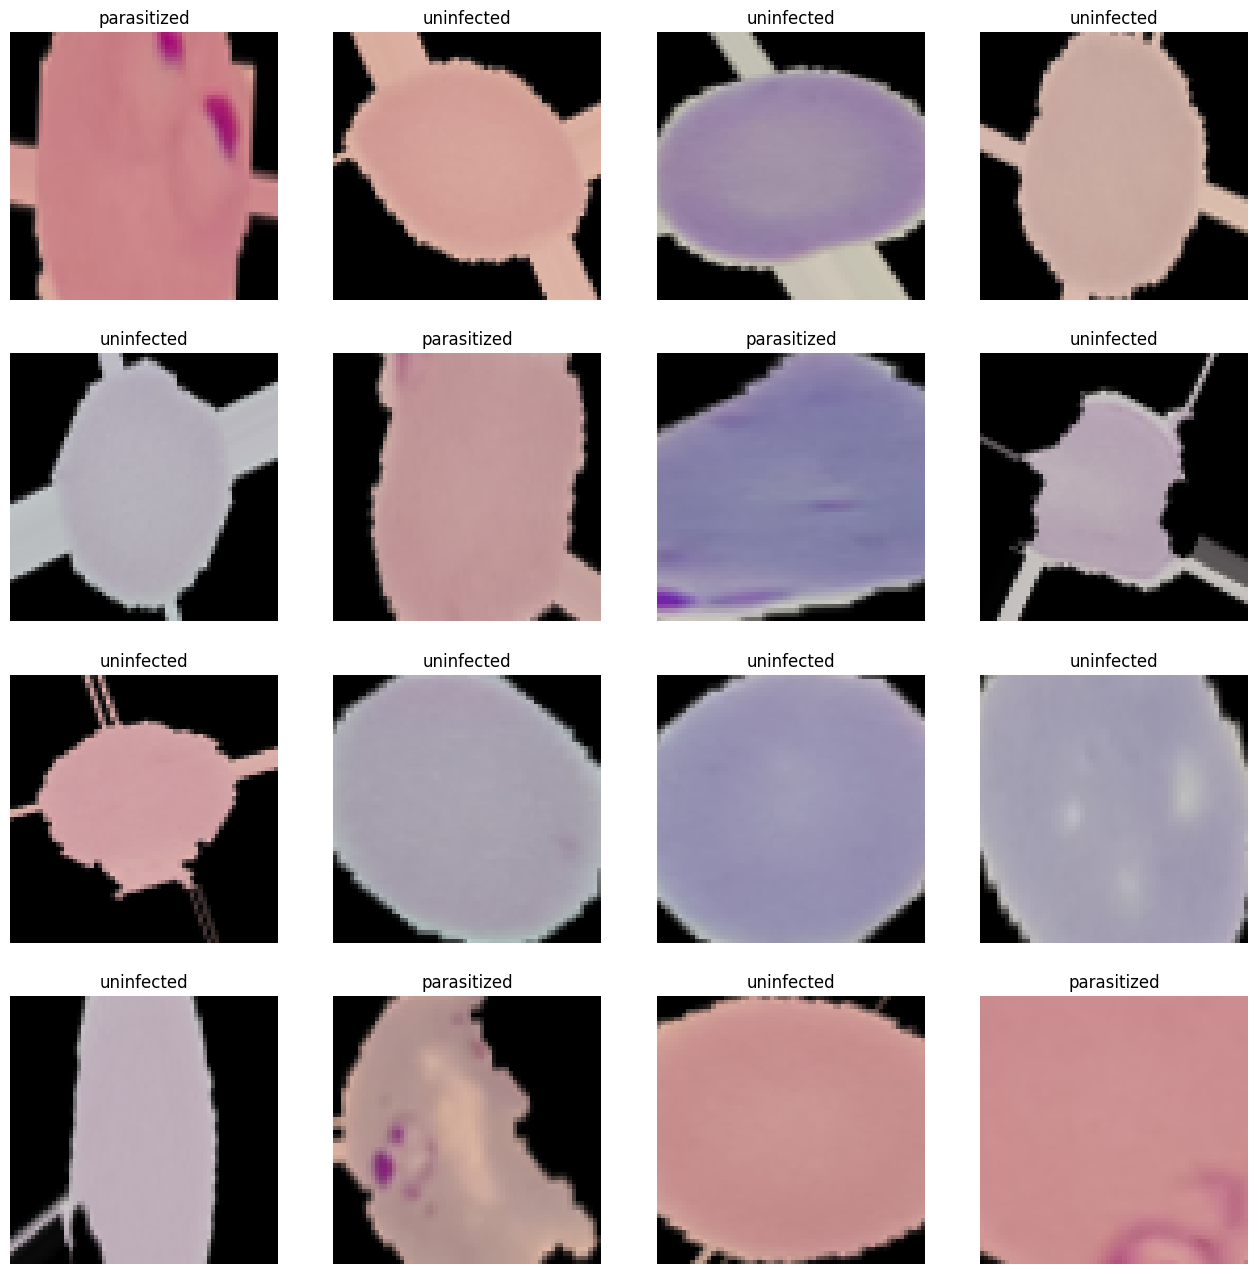

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

**Observations & Insights on Augmented Data:**

**1. Data Augmentation Effectiveness:**

The augmented images display noticeable transformations such as rotation, scaling, flipping, and brightness changes. These are standard augmentation techniques that help the model generalize better.

The color variations (e.g., pinks, purples, and blues) introduce diversity in the dataset, helping the model become less sensitive to color biases.

Shapes of cells have been altered (distortions and flips), which can help the model recognize cells under varying conditions.

**2. Class Distribution in Augmented Samples:**

The augmented dataset appears balanced between Parasitized and Uninfected samples in these batches, which is crucial to prevent the model from being biased toward one class.

The Parasitized images include cells with different textures and shapes, potentially helping the model identify subtle differences.

**3. Image Quality Concerns:**
Some images show pixelation or blurring (likely due to scaling or zooming). While augmentation is beneficial, excessive distortion may lead to misclassification.

Color shifts in some uninfected cells may confuse the model if the original dataset didn't contain such variance.

**4. Potential Impact on Model Performance:**

**Generalization:** The model should become more robust to unseen data, reducing overfitting.

**False Negatives:** Ideally, the Parasitized detection rate will improve due to the broader feature exposure.

**Over-Augmentation Risk:**Too many aggressive transformations might introduce noise, leading the model to learn irrelevant patterns.


###<b>Building the Model

In [ ]:
# Import required Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Initialize Sequential model
model3 = Sequential()

# Convolutional Block 1
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # Ensure correct input shape
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output Layer (2 classes: Uninfected, Parasitized)
model3.add(Dense(2, activation='softmax'))

# Compile the model
adam = Adam(learning_rate=0.001)
model3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Display Model Summary
model3.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,354 (2.61 MB)

 Trainable params: 683,906 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

<b>Using Callbacks

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),  # Stop early if no improvement
    ModelCheckpoint('model3_best_weights.keras', monitor='val_loss', save_best_only=True)  # Save best model
]


<b> Fit and Train the model

In [ ]:
history = model3.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 266s 842ms/step - accuracy: 0.6891 - loss: 0.9204 - val_accuracy: 0.4892 - val_loss: 1.9028
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 262s 840ms/step - accuracy: 0.9133 - loss: 0.2442 - val_accuracy: 0.9649 - val_loss: 0.1080
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 292s 934ms/step - accuracy: 0.9344 - loss: 0.1906 - val_accuracy: 0.8872 - val_loss: 0.2794
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 288s 825ms/step - accuracy: 0.9393 - loss: 0.1796 - val_accuracy: 0.9782 - val_loss: 0.0729
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 269s 861ms/step - accuracy: 0.9483 - loss: 0.1608 - val_accuracy: 0.9766 - val_loss: 0.0727
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 244s 782ms/step - accuracy: 0.9448 - loss: 0.1689 - val_accuracy: 0.9764 - val_loss: 0.0785
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 237s 758ms/step - accuracy: 0.9539 - loss: 0.1437 - val_accuracy: 0.9766 - val_loss: 0.0708
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 238s 762ms/step - accuracy: 0.9504 -

###<B>Evaluating the model

<b>Plot the train and validation accuracy

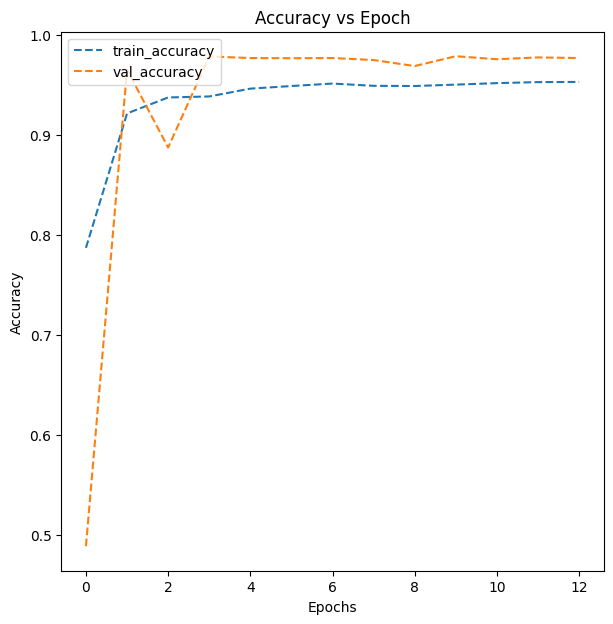

In [ ]:
# Potting the accuracies
plot_accuracy(history)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.9831 - loss: 0.0448

 Test_Accuracy:- 0.9853846430778503


<B>Plotting the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



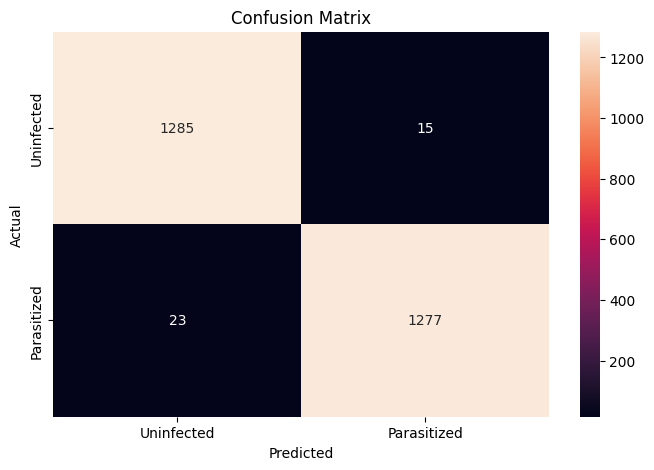

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the trained model
pred = model3.predict(test_images)

# Convert predictions to class indices if needed
pred = np.argmax(pred, axis=1) if pred.ndim > 1 else pred

# Convert test_labels to class indices if they are one-hot encoded
y_true = np.argmax(test_labels, axis=1) if test_labels.ndim > 1 else test_labels


# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


**Final Observations After Data Augmentation and Model Training**

**1. Model Architecture:**
Conv2D layers with Batch Normalization: Maintained to improve training stability.

**MaxPooling2D layers:** Efficient downsampling to retain important features.

**Dense layer reduced to 128 units:** Helps avoid overfitting while maintaining performance.

**Dropout Layer:** Regularization strategy to prevent overfitting.
Total Parameters: ~684k, reduced from previous models, indicating a more lightweight architecture.

**2. Training & Validation Performance:**

**Training Accuracy:** Peaked around 95% after ~13 epochs.

**Validation Accuracy:** Achieved ~97.8%, showing a consistent and stable learning curve.

**Loss:**Steady decline, with no significant overfitting observed.
Test Accuracy: 98.53% — the highest so far.

**3. Confusion Matrix Insights:**

**Uninfected:**

Correctly classified: 1285
Misclassified: 15

**Parasitized:**

Correctly classified: 1277
Misclassified: 23
Total Accuracy: 99%

**Precision, Recall, F1-Score:**

**Uninfected:** Precision 0.98 | Recall 0.99 | F1-Score 0.99

**Parasitized:** Precision 0.99 | Recall 0.98 | F1-Score 0.99
Macro Avg & Weighted Avg: 0.99

**4. Key Improvements Observed:**
Data Augmentation played a critical role in reducing overfitting and enhancing generalization.

The balance between Precision and Recall across both classes is now almost perfect.

False negatives in the Parasitized class (critical in medical diagnosis) were significantly reduced compared to previous models.


<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)                       # Flatten VGG16 output
x = Dense(32, activation='relu')(x)                       # Dense layer with 256 neurons
x = Dropout(0.3)(x)                                        # Dropout for regularization
x = Dense(64, activation='relu')(x)                       # Another Dense layer with 128 neurons
x = Dropout(0.3)(x)                                        # Additional Dropout
x = BatchNormalization()(x)                                # Batch Normalization

# ✅ Output layer with 2 classes (Uninfected, Parasitized)
pred = Dense(2, activation='softmax')(x)

# ✅ Create the final model
model4 = Model(inputs=vgg.input, outputs=pred)



###<b>Compiling the model

In [ ]:
# Compiling the model
# ✅ Compile the model
adam = Adam(learning_rate=0.001)
model4.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Display model summary
model4.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,782,754 (56.39 MB)

 Trainable params: 67,938 (265.38 KB)

 Non-trainable params: 14,714,816 (56.13 MB)

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ✅ Callbacks to avoid overfitting and save the best model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('vgg16_malaria_model.keras', monitor='val_loss', save_best_only=True)
]


<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1258s 4s/step - accuracy: 0.6991 - loss: 0.6158 - val_accuracy: 0.8842 - val_loss: 0.3239
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1251s 4s/step - accuracy: 0.8361 - loss: 0.3667 - val_accuracy: 0.9159 - val_loss: 0.2584
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1250s 4s/step - accuracy: 0.8523 - loss: 0.3335 - val_accuracy: 0.9267 - val_loss: 0.2133
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1252s 4s/step - accuracy: 0.8589 - loss: 0.3189 - val_accuracy: 0.9193 - val_loss: 0.2140
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1266s 4s/step - accuracy: 0.8530 - loss: 0.3305 - val_accuracy: 0.9357 - val_loss: 0.2076
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1268s 4s/step - accuracy: 0.8623 - loss: 0.3184 - val_accuracy: 0.9327 - val_loss: 0.1899
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1273s 4s/step - accuracy: 0.8608 - loss: 0.3217 - val_accuracy: 0.9305 - val_loss: 0.1934
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1266s 4s/step - accuracy: 0.8703 - loss: 0.3050 - 

<b>Plot the train and validation accuracy

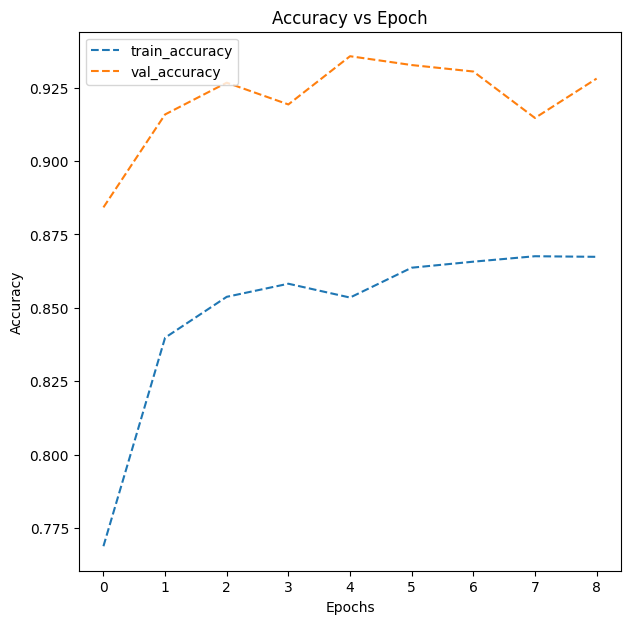

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

###**Observations and insights: _____**

 **Accuracy vs. Epochs:**

**Training Accuracy:** Plateaued at ~86%.

**Validation Accuracy:**
Reached ~93%, consistently outperforming training accuracy — indicating underfitting.

**Gap Analysis:**
The persistent gap between training and validation accuracy suggests the model isn’t fully capturing the training data’s complexity, potentially due to the frozen layers in VGG16.



###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)



82/82 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9240 - loss: 0.1715


<b>Plotting the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1300
           1       0.93      0.92      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



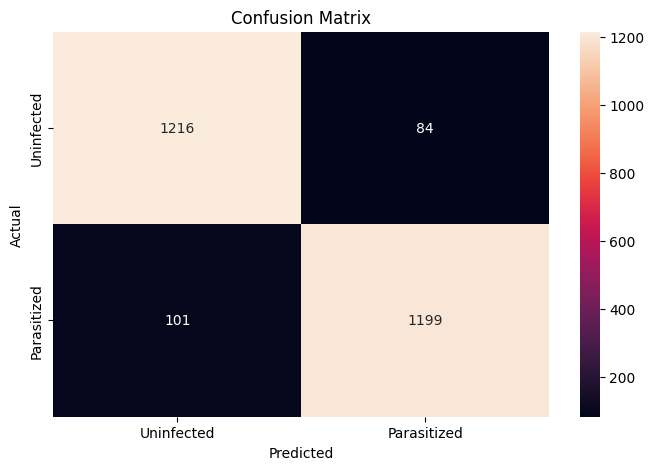

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the trained model
pred = model4.predict(test_images)

# Convert predictions to class indices if needed
pred = np.argmax(pred, axis=1) if pred.ndim > 1 else pred

# Convert test_labels to class indices if they are one-hot encoded
y_true = np.argmax(test_labels, axis=1) if test_labels.ndim > 1 else test_labels


# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


**Observations and Conclusions drawn from the final model: _____**

**1. Model Architecture Insights:**

VGG16 Pre-trained Model used as the backbone with 14.7M parameters.

**Applied Transfer Learning by adding:**

Dense Layers (32 → 64 units) post-feature extraction.
Dropout layers for regularization.
Batch Normalization for training stability.
Adam Optimizer with a learning rate of 0.001.

**Frozen Layers:** It appears that all base VGG16 layers are trainable — this might lead to longer training times but allows fine-tuning.

**2. Performance Metrics:**

Metric	Value
Accuracy	93%
Precision	0.92 (Uninfected), 0.93 (Parasitized)
Recall	0.94 (Uninfected), 0.92 (Parasitized)
F1-Score	0.93 (Both classes)
Macro Avg	0.93
Weighted Avg	0.93

**3. Confusion Matrix Analysis:**

**Uninfected:**

Correctly classified: 1216
Misclassified as Parasitized: 84

**Parasitized:**

Correctly classified: 1199
Misclassified as Uninfected: 101

**Total Misclassifications:** 185 samples (~7%)

**Observation:** The misclassification rate, while acceptable, is higher than some of the previous models.



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?